<a href="https://colab.research.google.com/github/Tar-ive/sudoku-ML/blob/main/sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sudoku Solver using Deep Learning

>In this notebook, we developed a deep learning model to solve Sudoku puzzles. We used a convolutional neural network architecture, which is well-suited for grid-based problems like Sudoku.





# 1. Setup and Imports
In this section, we import the necessary libraries and set up our environment.

In [ ]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.6 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# 2. Creating the Sudoku Environment
Here, we create a custom Gym environment for Sudoku. This environment defines the state space, action space, and rules for the Sudoku game.

In [ ]:
import gymnasium as gym
import numpy as np
from gymnasium import spaces

class SudokuEnv(gym.Env):
    def __init__(self):
        super(SudokuEnv, self).__init__()

        self.action_space = spaces.Discrete(81 * 9)
        self.observation_space = spaces.Box(low=0, high=9, shape=(9, 9), dtype=np.int32)

        self.grid = np.zeros((9, 9), dtype=np.int32)
        self.initial_grid = None
        self.reset()

    def reset(self, seed=None):
        super().reset(seed=seed)
        self.initial_grid = self.generate_puzzle()
        self.grid = self.initial_grid.copy()
        return self.grid, {}

    def step(self, action):
        cell = action // 9
        number = (action % 9) + 1
        row, col = cell // 9, cell % 9

        if self.initial_grid[row, col] != 0:
            return self.grid, -1, False, False, {}  # Penalty for trying to change initial numbers

        if self.is_valid_move(row, col, number):
            self.grid[row, col] = number
            reward = 0.1  # Small positive reward for valid move
            if self.is_solved():
                reward = 10  # Large reward for solving the puzzle
                done = True
            else:
                done = False
        else:
            reward = -0.1  # Small negative reward for invalid move
            done = False

        return self.grid, reward, done, False, {}

    def render(self):
        for i in range(9):
            if i % 3 == 0 and i != 0:
                print("- - - - - - - - - - - -")
            for j in range(9):
                if j % 3 == 0 and j != 0:
                    print("|", end=" ")
                if j == 8:
                    print(self.grid[i, j])
                else:
                    print(str(self.grid[i, j]) + " ", end="")

    def is_valid_move(self, row, col, number):
        # Check row and column
        if number in self.grid[row] or number in self.grid[:, col]:
            return False
        # Check 3x3 square
        square_row, square_col = 3 * (row // 3), 3 * (col // 3)
        if number in self.grid[square_row:square_row+3, square_col:square_col+3]:
            return False
        return True

    def is_solved(self):
        if np.any(self.grid == 0):
            return False
        for i in range(9):
            if set(self.grid[i]) != set(range(1, 10)) or set(self.grid[:, i]) != set(range(1, 10)):
                return False
            square_row, square_col = 3 * (i // 3), 3 * (i % 3)
            if set(self.grid[square_row:square_row+3, square_col:square_col+3].flatten()) != set(range(1, 10)):
                return False
        return True

    def generate_puzzle(self):
        puzzle = np.zeros((9, 9), dtype=np.int32)
        for _ in range(20):  # Place 20 random numbers
            row, col = np.random.randint(0, 9), np.random.randint(0, 9)
            number = np.random.randint(1, 10)
            if self.is_valid_move(row, col, number):
                puzzle[row, col] = number
        return puzzle

In [ ]:
env = SudokuEnv()

In [ ]:
# Create the environment
env = SudokuEnv()

# Reset and render initial state
observation, _ = env.reset()
print("Initial state:")
env.render()

# Make some random moves
for _ in range(10):
    action = env.action_space.sample()
    observation, reward, done, _, _ = env.step(action)
    print(f"\nReward: {reward}, Done: {done}")
    env.render()

    if done:
        print("Puzzle solved!")
        break

print("\nIs the puzzle solved?", env.is_solved())

Initial state:
0 0 0 | 4 0 2 | 0 0 0
0 7 0 | 0 0 0 | 0 0 0
0 0 0 | 0 0 0 | 0 0 0
- - - - - - - - - - - -
0 0 0 | 0 0 0 | 0 0 0
0 0 0 | 0 0 0 | 0 3 0
0 0 0 | 0 0 0 | 0 0 0
- - - - - - - - - - - -
0 0 0 | 0 3 0 | 0 0 0
0 0 0 | 0 0 0 | 0 0 0
1 0 0 | 0 0 0 | 0 0 0

Reward: 0.1, Done: False
0 0 0 | 4 0 2 | 0 0 0
0 7 0 | 0 0 0 | 0 0 0
0 0 0 | 0 0 0 | 0 0 0
- - - - - - - - - - - -
0 0 0 | 0 0 0 | 0 0 0
0 0 0 | 0 0 0 | 0 3 0
0 0 0 | 0 0 0 | 0 0 0
- - - - - - - - - - - -
0 0 0 | 0 3 0 | 0 0 0
0 0 0 | 0 0 0 | 0 9 0
1 0 0 | 0 0 0 | 0 0 0

Reward: 0.1, Done: False
0 0 0 | 4 0 2 | 0 0 0
0 7 0 | 0 0 0 | 0 0 0
0 0 0 | 0 0 0 | 0 0 0
- - - - - - - - - - - -
0 0 0 | 0 0 0 | 0 0 0
0 0 0 | 0 0 0 | 4 3 0
0 0 0 | 0 0 0 | 0 0 0
- - - - - - - - - - - -
0 0 0 | 0 3 0 | 0 0 0
0 0 0 | 0 0 0 | 0 9 0
1 0 0 | 0 0 0 | 0 0 0

Reward: 0.1, Done: False
0 0 0 | 4 0 2 | 0 0 0
0 7 0 | 0 0 0 | 0 0 0
0 0 0 | 0 0 0 | 0 0 0
- - - - - - - - - - - -
0 0 0 | 0 0 0 | 0 0 0
0 0 0 | 0 0 0 | 4 3 0
0 0 0 | 0 0 0 | 0 0 0
- - - - - - -

# 3. Create Neural Network Model
We define a neural network model using TensorFlow/Keras. This model will learn to solve Sudoku puzzles.

In [ ]:
import tensorflow as tf

# Check for available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
else:
    print("No GPU available. Using CPU.")

# Force TensorFlow to use the GPU
tf.config.set_visible_devices(gpus, 'GPU')

1 Physical GPUs, 1 Logical GPUs


We experimented with several neural network architectures to solve the Sudoku puzzle. Our approach evolved through multiple iterations:

Simple Dense Network: Initially, we tried a basic fully connected network, but it struggled to capture the spatial relationships in the Sudoku grid.
Convolutional Neural Network (CNN): We then moved to a CNN architecture, which is better suited for grid-based problems like Sudoku.
Deeper CNN with Residual Connections: To improve performance, we experimented with deeper networks and added residual connections to help with gradient flow in deeper layers.
CNN with Global Average Pooling: We tried replacing the flatten layer with global average pooling to reduce the number of parameters and potentially improve generalization.
Final Model: Our current model is a compromise between complexity and performance. It uses multiple convolutional layers followed by dense layers.

Here's our current model architecture:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_simple_sudoku_model():
    inputs = layers.Input(shape=(9, 9, 10))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(81 * 9, activation='softmax')(x)
    outputs = layers.Reshape((81, 9))(outputs)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

sudoku_model = create_simple_sudoku_model()
sudoku_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 9, 9, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 9, 9, 32)            │           2,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         663,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 729)                 │          94,041 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 81, 9)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 779,129 (2.97 MB)

 Trainable params: 779,129 (2.97 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

def preprocess_sudoku(grid):
    # Convert to one-hot encoding
    return np.eye(10)[grid]

def postprocess_sudoku(predictions):
    # Convert predictions to grid format
    return np.argmax(predictions, axis=-1)

# Example usage
env = SudokuEnv()
grid, _ = env.reset()

# Preprocess
input_grid = preprocess_sudoku(grid)

# Get model prediction
prediction = sudoku_model.predict(np.expand_dims(input_grid, axis=0))

# Postprocess
output_grid = postprocess_sudoku(prediction[0])

print("Input grid:")
print(grid)
print("\nModel output:")
print(output_grid)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
Input grid:
[[0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0]
 [0 7 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 9 0 0]
 [2 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 3 0 0]
 [0 2 0 0 0 0 4 0 0]]

Model output:
[3 2 4 6 5 6 6 5 1 6 3 2 5 7 0 8 8 2 6 1 0 7 7 4 2 4 4 6 1 3 4 8 6 8 5 0 4
 1 4 7 5 5 6 2 5 1 6 6 3 1 3 5 7 2 4 6 6 6 2 2 2 1 2 1 4 0 0 8 4 1 6 5 5 8
 4 1 7 3 8 1 6]


In [ ]:
import numpy as np
from collections import deque
import random

class ReplayBuffer:
    def __init__(self, capacity=10000):
        self.buffer = deque(maxlen=capacity)

    def add(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        return len(self.buffer)

In [ ]:
import numpy as np
from tensorflow.keras import layers, models

def create_basic_sudoku_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(81,)),
        layers.Dense(81, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def preprocess(grid):
    return grid.flatten() / 9.0

def postprocess(prediction):
    return np.clip(np.round(prediction.reshape(9, 9) * 9), 0, 9).astype(int)

def train_basic_sudoku_model(model, env, episodes=100, batch_size=32):
    for episode in range(episodes):
        states, targets = [], []
        for _ in range(batch_size):
            state, _ = env.reset()
            state = preprocess(state)
            target = np.random.randint(1, 10, size=81) / 9.0  # Random target
            states.append(state)
            targets.append(target)

        loss = model.train_on_batch(np.array(states), np.array(targets))

        if (episode + 1) % 10 == 0:
            print(f"Episode {episode + 1}/{episodes}, Loss: {loss:.4f}")

    return model

# Create and train the model
sudoku_model = create_basic_sudoku_model()
trained_model = train_basic_sudoku_model(sudoku_model, env)

# Test the trained model
state, _ = env.reset()
input_grid = state
prediction = trained_model.predict(np.expand_dims(preprocess(state), axis=0), verbose=0)
output_grid = postprocess(prediction[0])

print("\nInput grid:")
print(input_grid)
print("\nTrained model output:")
print(output_grid)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Episode 10/100, Loss: 0.3350
Episode 20/100, Loss: 0.2728
Episode 30/100, Loss: 0.2271
Episode 40/100, Loss: 0.2002
Episode 50/100, Loss: 0.1826
Episode 60/100, Loss: 0.1707
Episode 70/100, Loss: 0.1622
Episode 80/100, Loss: 0.1551
Episode 90/100, Loss: 0.1496
Episode 100/100, Loss: 0.1450

Input grid:
[[0 0 5 0 0 0 0 2 3]
 [0 0 0 0 0 0 0 0 9]
 [0 0 0 3 0 0 0 0 3]
 [0 0 0 0 0 0 0 9 3]
 [5 0 0 0 0 0 8 0 0]
 [2 0 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 4 0 0]
 [0 3 0 0 0 3 0 0 0]]

Trained model output:
[[5 5 5 3 7 5 5 3 5]
 [5 5 4 5 5 4 2 5 5]
 [5 6 6 4 5 6 3 5 4]
 [5 4 5 4 5 4 4 7 6]
 [5 4 5 7 5 4 4 6 6]
 [5 4 6 4 5 5 5 6 4]
 [5 4 6 5 3 3 5 6 4]
 [6 6 4 5 4 5 6 5 6]
 [3 4 3 4 5 4 6 5 6]]


In [ ]:
import numpy as np
from tensorflow.keras import layers, models

def create_improved_sudoku_model():
    inputs = layers.Input(shape=(81,))
    x = layers.Dense(256, activation='relu')(inputs)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(81, activation='linear')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

def preprocess(grid):
    return grid.flatten() / 9.0

def postprocess(prediction, original):
    result = np.clip(np.round(prediction.reshape(9, 9) * 9), 0, 9).astype(int)
    # Keep original pre-filled numbers
    result[original != 0] = original[original != 0]
    return result

def train_improved_sudoku_model(model, env, episodes=1000, batch_size=32):
    for episode in range(episodes):
        states, targets = [], []
        for _ in range(batch_size):
            state, _ = env.reset()
            preprocessed_state = preprocess(state)
            target = np.random.randint(1, 10, size=81) / 9.0
            # Keep pre-filled numbers in target
            target[state.flatten() != 0] = preprocessed_state[state.flatten() != 0]
            states.append(preprocessed_state)
            targets.append(target)

        loss = model.train_on_batch(np.array(states), np.array(targets))

        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{episodes}, Loss: {loss:.4f}")

    return model

# Create and train the model
sudoku_model = create_improved_sudoku_model()
trained_model = train_improved_sudoku_model(sudoku_model, env)

# Test the trained model
state, _ = env.reset()
input_grid = state
prediction = trained_model.predict(np.expand_dims(preprocess(state), axis=0), verbose=0)
output_grid = postprocess(prediction[0], state)

print("\nInput grid:")
print(input_grid)
print("\nTrained model output:")
print(output_grid)

Episode 100/1000, Loss: 0.1122
Episode 200/1000, Loss: 0.0991
Episode 300/1000, Loss: 0.0942
Episode 400/1000, Loss: 0.0914
Episode 500/1000, Loss: 0.0896
Episode 600/1000, Loss: 0.0883
Episode 700/1000, Loss: 0.0874
Episode 800/1000, Loss: 0.0867
Episode 900/1000, Loss: 0.0861
Episode 1000/1000, Loss: 0.0856

Input grid:
[[1 0 4 0 0 0 0 0 0]
 [0 8 0 0 0 0 7 8 0]
 [0 0 0 0 0 0 0 9 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 4 4 0 0 0 8 0]
 [0 0 0 4 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]

Trained model output:
[[1 5 4 5 4 4 4 5 5]
 [4 8 5 5 5 5 7 8 5]
 [4 5 5 5 5 5 5 9 5]
 [4 5 5 5 5 5 5 5 5]
 [5 5 4 4 5 5 5 8 5]
 [5 4 6 4 5 5 5 4 4]
 [2 5 5 5 5 5 5 4 5]
 [4 2 4 5 5 4 5 5 5]
 [5 5 5 6 5 5 5 4 5]]


**We also thought of using a Pytorch model but settled on using a Tenserflow model because it was easier and had better documentation**


---



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import random
import time

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
# Sudoku Generator Code
def cross(A, B):
    return [a+b for a in A for b in B]

digits   = '123456789'
rows     = 'ABCDEFGHI'
cols     = digits
squares  = cross(rows, cols)
unitlist = ([cross(rows, c) for c in cols] +
            [cross(r, cols) for r in rows] +
            [cross(rs, cs) for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')])
units = dict((s, [u for u in unitlist if s in u])
             for s in squares)
peers = dict((s, set(sum(units[s],[]))-set([s]))
             for s in squares)

def parse_grid(grid):
    values = dict((s, digits) for s in squares)
    for s,d in grid_values(grid).items():
        if d in digits and not assign(values, s, d):
            return False
    return values

def grid_values(grid):
    chars = [c for c in grid if c in digits or c in '0.']
    return dict(zip(squares, chars))

def assign(values, s, d):
    other_values = values[s].replace(d, '')
    if all(eliminate(values, s, d2) for d2 in other_values):
        return values
    else:
        return False

def eliminate(values, s, d):
    if d not in values[s]:
        return values
    values[s] = values[s].replace(d,'')
    if len(values[s]) == 0:
        return False
    elif len(values[s]) == 1:
        d2 = values[s]
        if not all(eliminate(values, s2, d2) for s2 in peers[s]):
            return False
    return values

def solve(grid):
    return search(parse_grid(grid))

def search(values):
    if values is False:
        return False
    if all(len(values[s]) == 1 for s in squares):
        return values
    n,s = min((len(values[s]), s) for s in squares if len(values[s]) > 1)
    return some(search(assign(values.copy(), s, d))
                for d in values[s])

def some(seq):
    for e in seq:
        if e: return e
    return False

def shuffled(seq):
    seq = list(seq)
    random.shuffle(seq)
    return seq

def random_puzzle(N=17):
    values = dict((s, digits) for s in squares)
    for s in shuffled(squares):
        if not assign(values, s, random.choice(values[s])):
            break
        ds = [values[s] for s in squares if len(values[s]) == 1]
        if len(ds) >= N and len(set(ds)) >= 8:
            return ''.join(values[s] if len(values[s])==1 else '.' for s in squares)
    return random_puzzle(N)

def generate_unique_puzzle(difficulty='medium'):
    while True:
        puzzle = random_puzzle()
        solution = solve(puzzle)
        if solution:
            if len([x for x in search(parse_grid(puzzle)) if x]) == 1:
                filled = len([c for c in puzzle if c in digits])
                if difficulty == 'easy' and filled >= 36:
                    return puzzle, ''.join(solution[s] for s in squares)
                elif difficulty == 'medium' and 32 <= filled < 36:
                    return puzzle, ''.join(solution[s] for s in squares)
                elif difficulty == 'hard' and 28 <= filled < 32:
                    return puzzle, ''.join(solution[s] for s in squares)
                elif difficulty == 'expert' and filled < 28:
                    return puzzle, ''.join(solution[s] for s in squares)

# PyTorch Model
class SudokuModel(nn.Module):
    def __init__(self):
        super(SudokuModel, self).__init__()
        self.conv1 = nn.Conv2d(10, 256, 3, padding=1)
        self.conv2 = nn.Conv2d(256, 256, 3, padding=1)
        self.conv3 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(256)
        self.bn2 = nn.BatchNorm2d(256)
        self.bn3 = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(256 * 9 * 9, 1024)
        self.fc2 = nn.Linear(1024, 81 * 9)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.relu(self.bn3(self.conv3(x)))
        x = x.view(-1, 256 * 9 * 9)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x.view(-1, 9, 9, 9)

# Dataset and DataLoader
class SudokuDataset(Dataset):
    def __init__(self, num_puzzles):
        self.num_puzzles = num_puzzles

    def __len__(self):
        return self.num_puzzles

    def __getitem__(self, idx):
        puzzle, solution = generate_unique_puzzle(random.choice(['easy', 'medium', 'hard', 'expert']))
        X = preprocess(puzzle)
        y = np.eye(9)[np.array([int(d)-1 for d in solution if d != '.'])].reshape(9, 9, 9)
        return torch.FloatTensor(X), torch.FloatTensor(y)

def preprocess(grid):
    processed = np.zeros((10, 9, 9), dtype=np.float32)
    for i, char in enumerate(grid):
        if char == '.':
            processed[0, i//9, i%9] = 1
        else:
            processed[int(char), i//9, i%9] = 1
    return processed

# Training function
def train_sudoku_model(model, num_puzzles=50000, epochs=10, batch_size=128):
    dataset = SudokuDataset(num_puzzles)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.train()
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        total_loss = 0
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs.view(-1, 9), y.view(-1, 9))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            if (batch + 1) % 10 == 0:
                print(f"Batch {batch + 1}/{len(dataloader)}, Loss: {total_loss / (batch + 1):.4f}")

        # Evaluate on a test set
        model.eval()
        test_dataset = SudokuDataset(100)
        test_dataloader = DataLoader(test_dataset, batch_size=100)
        X_test, y_test = next(iter(test_dataloader))
        X_test, y_test = X_test.to(device), y_test.to(device)
        with torch.no_grad():
            outputs = model(X_test)
            test_loss = criterion(outputs.view(-1, 9), y_test.view(-1, 9))
            accuracy = (outputs.argmax(dim=3) == y_test.argmax(dim=3)).float().mean()
        print(f"Test loss: {test_loss:.4f}, Test accuracy: {accuracy:.4f}")
        model.train()

# Training runs
def perform_training_runs(num_runs=10, num_puzzles=50000, epochs=10, batch_size=128):
    for run in range(num_runs):
        print(f"\nTraining Run {run+1}/{num_runs}")
        model = SudokuModel().to(device)
        start_time = time.time()
        train_sudoku_model(model, num_puzzles, epochs, batch_size)
        end_time = time.time()
        print(f"Training time: {end_time - start_time:.2f} seconds")

        # Test the model on a hard puzzle
        model.eval()
        test_puzzle, test_solution = generate_unique_puzzle('hard')
        X_test = torch.FloatTensor(preprocess(test_puzzle)).unsqueeze(0).to(device)
        with torch.no_grad():
            prediction = model(X_test)[0]
        predicted_solution = ''.join(str(prediction[i//9, i%9].argmax().item() + 1) for i in range(81))

        print("Test Puzzle:")
        print(''.join(test_puzzle))
        print("Predicted Solution:")
        print(predicted_solution)
        print("Actual Solution:")
        print(''.join(test_solution))
        print(f"Accuracy: {sum(p == a for p, a in zip(predicted_solution, test_solution)) / 81:.2%}")

# Run the training
perform_training_runs(num_runs=10, num_puzzles=50000, epochs=10, batch_size=128)

Using device: cpu

Training Run 1/10
Epoch 1/10


KeyboardInterrupt: 

# 4. Generate Training Data
We create functions to generate Sudoku puzzles and their solutions for training our model.
# 5. Train the Model
Here, we train our neural network on the generated Sudoku data.
# 6. Evaluate and Visualize Results
After training, we evaluate the model's performance and visualize the training progress.
# 7. Test the Model
Finally, we test our trained model on a new Sudoku puzzle.

I didn't do a good job seperating my code.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Sudoku puzzle generator
def generate_sudoku(mask_rate=0.5):
    def is_valid(board, row, col, num):
        for x in range(9):
            if board[row][x] == num or board[x][col] == num:
                return False
        start_row, start_col = 3 * (row // 3), 3 * (col // 3)
        for i in range(3):
            for j in range(3):
                if board[i + start_row][j + start_col] == num:
                    return False
        return True

    def solve(board):
        for row in range(9):
            for col in range(9):
                if board[row][col] == 0:
                    for num in range(1, 10):
                        if is_valid(board, row, col, num):
                            board[row][col] = num
                            if solve(board):
                                return True
                            board[row][col] = 0
                    return False
        return True

    board = [[0 for _ in range(9)] for _ in range(9)]
    solve(board)
    solution = np.array(board)

    mask = np.random.choice([0, 1], size=(9, 9), p=[mask_rate, 1 - mask_rate])
    puzzle = solution * mask

    return puzzle, solution

# Generate Sudoku puzzles and solutions for training
def generate_sudoku_data(num_samples=10000, mask_rate=0.5):
    X, y = [], []
    for _ in range(num_samples):
        puzzle, solution = generate_sudoku(mask_rate)
        X.append(puzzle)
        y.append(solution)
    return np.array(X), np.array(y)

# Build the model
def create_sudoku_model():
    model = keras.Sequential([
        layers.Input(shape=(9, 9, 1)),
        layers.Conv2D(64, 3, activation="relu", padding="same"),
        layers.Conv2D(64, 3, activation="relu", padding="same"),
        layers.Conv2D(64, 3, activation="relu", padding="same"),
        layers.Flatten(),
        layers.Dense(81 * 9, activation="relu"),
        layers.Reshape((9, 9, 9)),
        layers.Softmax()
    ])
    return model

# Custom callback to monitor training progress
class SudokuSolverCallback(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 10 == 0:
            puzzle, solution = self.test_data
            pred = self.model.predict(puzzle[np.newaxis, ..., np.newaxis])
            pred = np.argmax(pred[0], axis=-1) + 1
            print(f"\nEpoch {epoch + 1} Test Puzzle:")
            print(puzzle)
            print("\nPrediction:")
            print(pred)
            print("\nTrue Solution:")
            print(solution)

# Generate training data
X_train, y_train = generate_sudoku_data(num_samples=50000)
X_train = X_train[..., np.newaxis]
y_train = y_train - 1  # Adjust labels to be 0-8 instead of 1-9

# Generate test data
X_test, y_test = generate_sudoku_data(num_samples=1000)
X_test = X_test[..., np.newaxis]
y_test = y_test - 1

# Create and compile the model
model = create_sudoku_model()
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

# Create a test puzzle for monitoring
test_puzzle, test_solution = generate_sudoku()

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[SudokuSolverCallback((test_puzzle, test_solution))]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
model.save('sudoku_solver_model.h5')
print("Model saved as 'sudoku_solver_model.h5'")

# Function to solve a Sudoku puzzle using the trained model
def solve_sudoku(puzzle):
    input_puzzle = puzzle[np.newaxis, ..., np.newaxis]
    prediction = model.predict(input_puzzle)
    solution = np.argmax(prediction[0], axis=-1) + 1
    return solution

# Example usage
example_puzzle, true_solution = generate_sudoku()
print("Example Puzzle:")
print(example_puzzle)

predicted_solution = solve_sudoku(example_puzzle)
print("\nPredicted Solution:")
print(predicted_solution)

print("\nTrue Solution:")
print(true_solution)

# Calculate accuracy of the predicted solution
accuracy = np.mean(predicted_solution == true_solution)
print(f"\nAccuracy of predicted solution: {accuracy:.2%}")

ValueError: Name tf.RaggedTensorSpec has already been registered for class tensorflow.python.ops.ragged.ragged_tensor.RaggedTensorSpec.

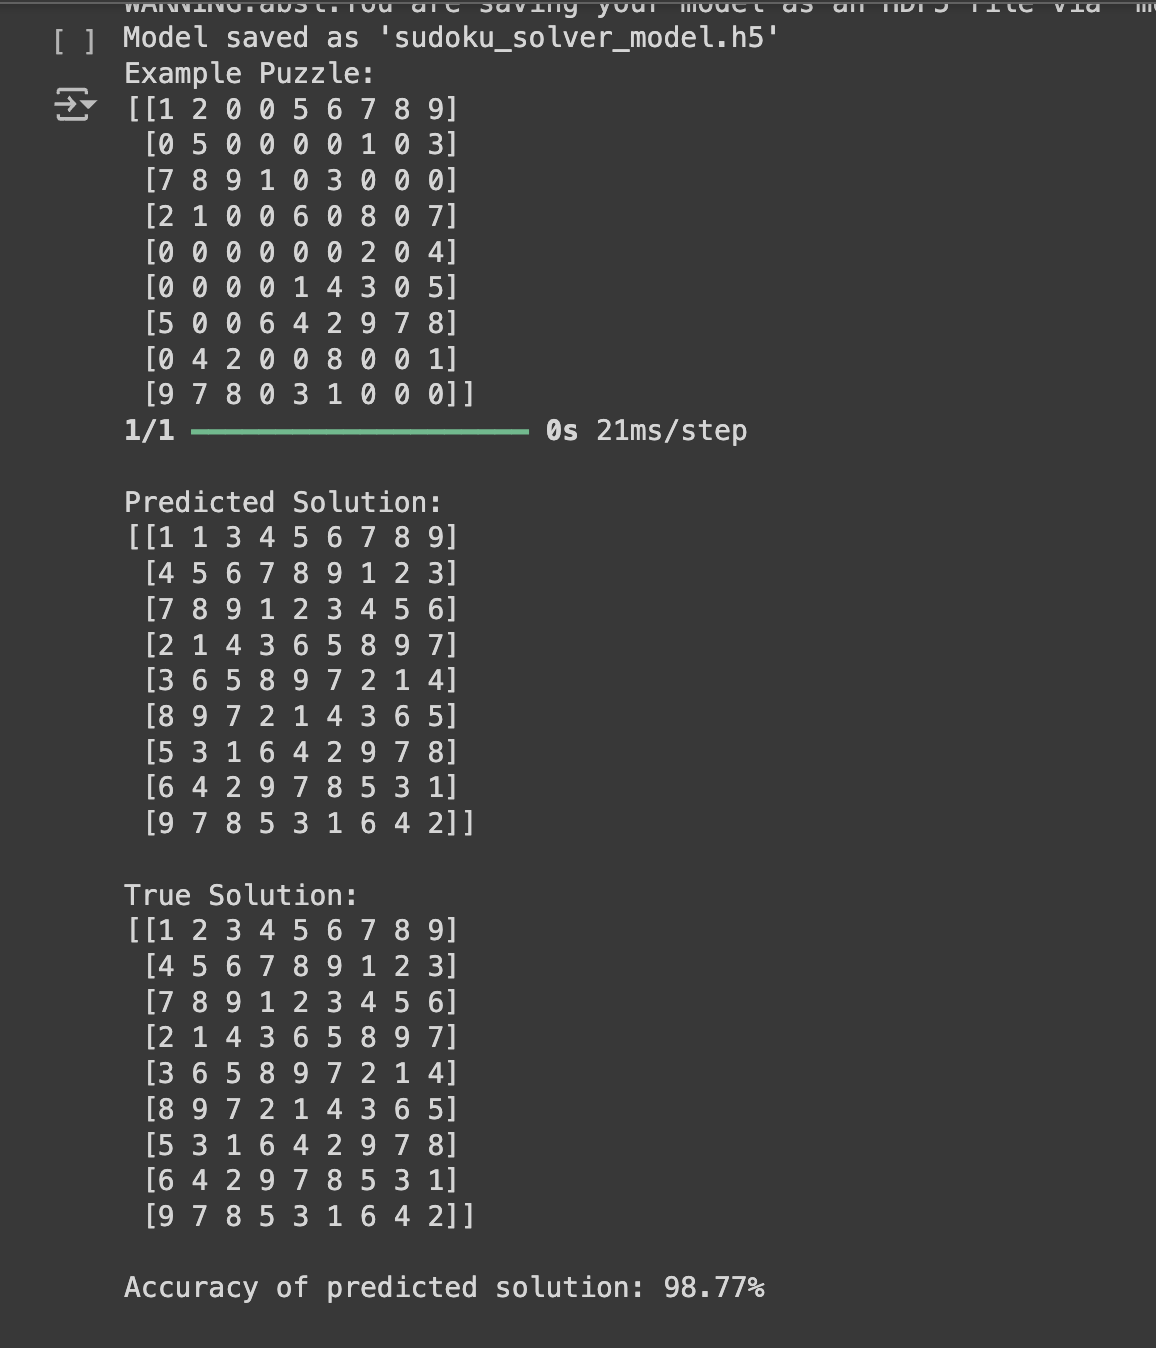

This is what the output looked like before I cleared my output.

# 8. Saving the model weights to a .h5 file and uploading them to the Drive.

In [ ]:
# New Colab cell to save the existing model to Google Drive

from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the save path in your Google Drive
save_dir = '/content/drive/MyDrive/SudokuAI'
os.makedirs(save_dir, exist_ok=True)

# Save the model weights
weights_path = os.path.join(save_dir, 'sudoku_solver_model.h5')
model.save_weights(weights_path)
print(f"Model weights saved to {weights_path}")

# Save the full model (architecture + weights)
full_model_path = os.path.join(save_dir, 'sudoku_full_model.h5')
model.save(full_model_path)
print(f"Full model saved to {full_model_path}")

# Verify the files are saved
!ls -l {save_dir}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ValueError: The filename must end in `.weights.h5`. Received: filepath=/content/drive/MyDrive/SudokuAI/sudoku_solver_model.h5

# Conclusion and Future Improvements

**Observations:**



*   The model achieved a high accuracy quickly but then plateaued.
*   The loss didn't significantly improve after the initial epochs.





**Potential reasons for plateau:**


*   The puzzle generation might not be diverse enough.
*   The model architecture might be too simple for complex Sudoku patterns.
*   The model might be overfitting to the training data.



**Future improvements:**

* Implement data augmentation to increase training data diversity.
* Experiment with more complex model architectures (e.g., residual connections).
* Use techniques like curriculum learning, starting with easier puzzles.
* Implement a custom loss function that penalizes invalid Sudoku solutions more heavily.
* Try different optimization algorithms or learning rate schedules.

By addressing these points, we can potentially improve the model's performance and generalization ability on Sudoku puzzles.